### Objective  : The objective of this project is to predict the sale price of an used automobile, in this case a Toyota Corolla

### Reading the dataset 

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

Importing the dataset

In [2]:
data = pd.read_csv('ToyotaCorolla.csv')
data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


Basic details about the dataset :

In [3]:
print('The number of rows in the dataset are:',data.shape[0])
print('The number of columns in the dataset are:',data.shape[1])

The number of rows in the dataset are: 1436
The number of columns in the dataset are: 10


In [4]:
print('The numerical columns are:',data.select_dtypes(include=np.number).columns)
print('The categorical columns are:',data.select_dtypes(include=object).columns)

The numerical columns are: Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight'],
      dtype='object')
The categorical columns are: Index(['FuelType'], dtype='object')


In [5]:
data.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


The above table shows descriptive statiscs i.e, the mean,min and max values among others for all the numerical columns in the dataset.

### Data preprocessing and Visualization

Checking for null/missing values

In [6]:
data.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

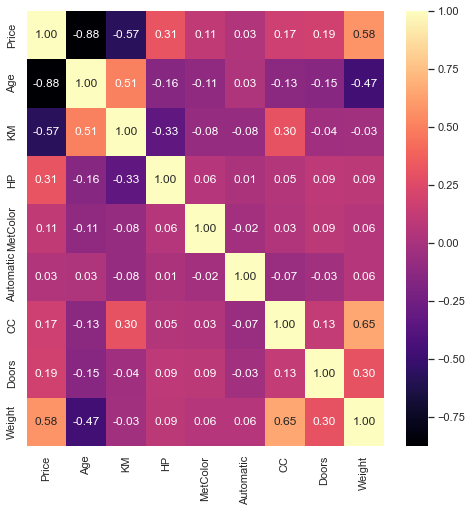

In [7]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")  
plt.show()

The above hatmap shows the correlation between different features in the dataset , for example age and price have a correlation of -0.88 which means they are highly negatively correlated, i.e, as the age increase the price decreases which usually holds true for used vehicles.

In [8]:
#Encoding the categorical features in the dataset so the machine can use the inputs in the form of numbers

data = pd.get_dummies(data,drop_first=True) 
data.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,1,0
1,13750,23,72937,90,1,0,2000,3,1165,1,0
2,13950,24,41711,90,1,0,2000,3,1165,1,0
3,14950,26,48000,90,0,0,2000,3,1165,1,0
4,13750,30,38500,90,0,0,2000,3,1170,1,0


The categorical variable Fuel type has been encoded as 0s and 1s for better understanding by the machine.

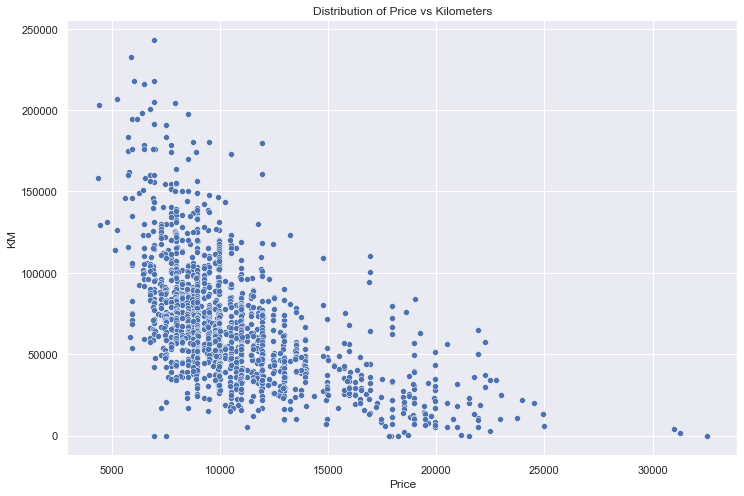

In [9]:
plt.figure(figsize=[12,8]);
sns.scatterplot(x=data['Price'],y=data['KM']);
plt.title('Distribution of Price vs Kilometers');

Inference: The above graph represents the relationship between Price and Kilometers run , and it can be noted that the more the distace the car covers, the price decreases. The less distance covered , the higher the price.

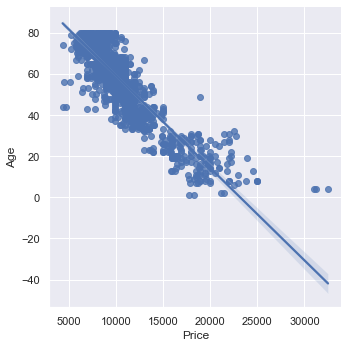

In [10]:
sns.lmplot(x='Price',y='Age',data=data,palette='m');

Inference: We can note that newly used cars tend to have a higher price and cars that have been used for a longer duration of time tend to have a lower price.

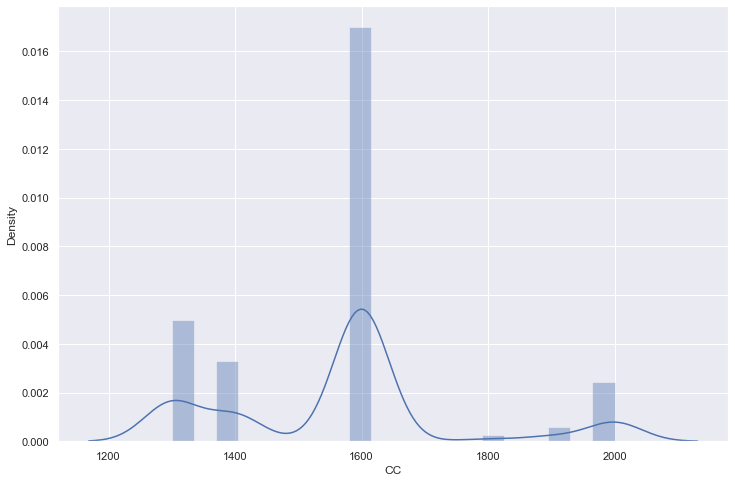

In [11]:
plt.figure(figsize=[12,8]);
sns.distplot(x=data['CC']);
plt.xlabel('CC');

Inference : The graph show the distribution of CC(Capacity of fuel and air)

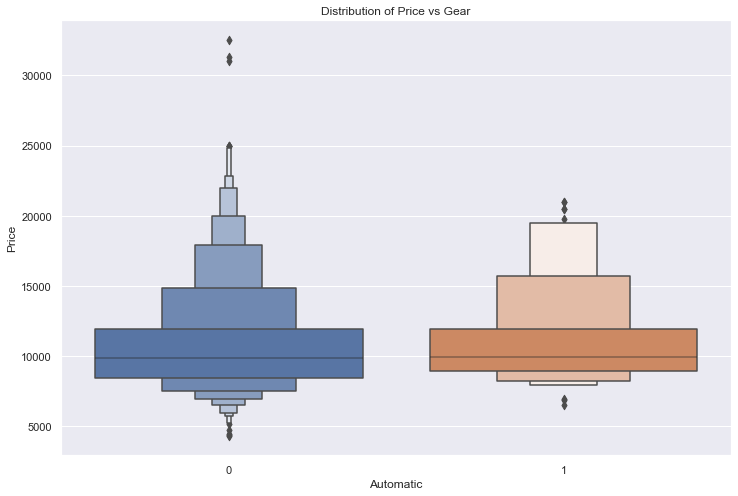

In [12]:
plt.figure(figsize=[12,8]);
sns.boxenplot(x=data['Automatic'],y=data['Price']);
plt.title('Distribution of Price vs Gear');

Inference: The price distribution/spread for cars with automatic and manual gears can be seen in the above graph.
The median price for used cars with manual gear and for cars with automatic gear is ~10000 ,but the max price for manual cars seem to be higher.

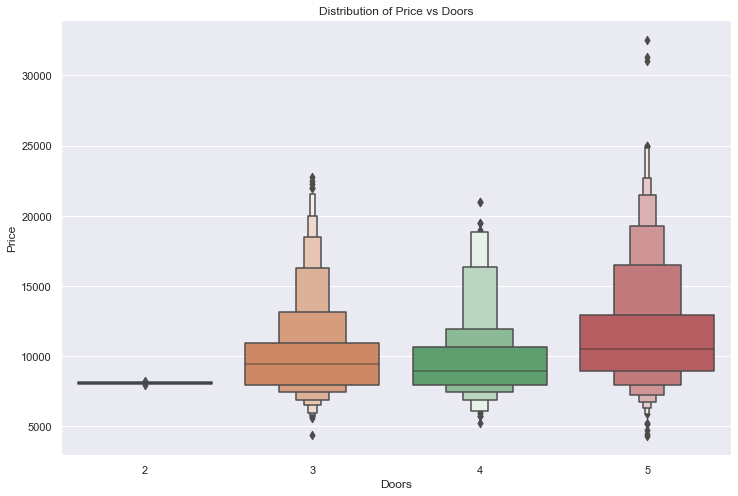

In [13]:
plt.figure(figsize=[12,8]);
sns.boxenplot(x=data['Doors'],y=data['Price']);
plt.title('Distribution of Price vs Doors');

Inference: The cars with 3 doors have a median price of ~8500 , those with 2 doors have a median price of ~8000 and those with 5 doors have a median price of ~11000. 
The cars with 5 doors seem to have a higher price compared to other models.

In [14]:
X = data.drop('Price', axis = 1).values
y = data.iloc[:, 0].values.reshape(-1,1)

Splitting the dataset into train and test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Statistically checking if the split is correct

In [16]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1077, 10)
Shape of X_test:  (359, 10)
Shape of y_train:  (1077, 1)
Shape of y_test (359, 1)


### Regression Models

#### 1) Linear Regression

In [17]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

Predicting the crossval score, R2 score for test and train and RMSE for the test split for Linear Regression

In [18]:
cv_linear = cross_val_score(estimator = linear_regressor, X = X_train, y = y_train, cv = 10)

y_pred_linear_train = linear_regressor.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = linear_regressor.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

In [19]:
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.8480754345159047
R2_score (train):  0.8702260786694702
R2_score (test):  0.8621869690956068
RMSE:  1398.4596051422188


#### 2) Decision Tree Regressor

In [20]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Predicting the crossval score, R2 score for test and train and RMSE for the test split for Decision Tree Regressor

In [21]:
cv_dt = cross_val_score(estimator = dt_regressor, X = X_train, y = y_train, cv = 10)

y_pred_dt_train = dt_regressor.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

y_pred_dt_test = dt_regressor.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

rmse_dt = (np.sqrt(mean_squared_error(y_test, y_pred_dt_test)))

In [22]:
print('CV: ', cv_dt.mean())
print('R2_score (train): ', r2_score_dt_train)
print('R2_score (test): ', r2_score_dt_test)
print("RMSE: ", rmse_dt)

CV:  0.8249698691480774
R2_score (train):  1.0
R2_score (test):  0.8425527330081217
RMSE:  1494.7630279577106


#### 3) Random Forest regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 1200, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1200, random_state=0)

In [24]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled = sc_X.fit_transform(X_train)
y_scaled = sc_y.fit_transform(y_train.reshape(-1,1))

In [25]:
cv_rf = cross_val_score(estimator = rf_regressor, X = X_scaled, y = y_train, cv = 10)

y_pred_rf_train = rf_regressor.predict(X_train)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_regressor.predict(X_test)
r2_score_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_rf = (np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))

In [26]:
print('CV: ', cv_rf.mean())
print('R2_score (train): ', r2_score_rf_train)
print('R2_score (test): ', r2_score_rf_test)
print("RMSE: ", rmse_rf)

CV:  0.895530214778247
R2_score (train):  0.9861806774622549
R2_score (test):  0.9161287499524277
RMSE:  1090.9663166685268


### Visualizing the performance of different models

In [27]:
models = [('Linear Regression', rmse_linear, r2_score_linear_train, r2_score_linear_test, cv_linear.mean()),
          ('Decision Tree Regressor', rmse_dt, r2_score_dt_train, r2_score_dt_test, cv_dt.mean()),
          ('Random Forest Regressor', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean())   
         ]

In [28]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,1398.459605,0.870226,0.862187,0.848075
1,Decision Tree Regressor,1494.763028,1.000000,0.842553,0.824970
2,Random Forest Regressor,1090.966317,0.986181,0.916129,0.895530


Inference: The R2 for decision tree regressor is almost 1 because it tends to overfit the data and does not perfom well with test data.
   
R2 for Random forest regressor is 0.96 for train and 0.91 for test which seems like a good score.

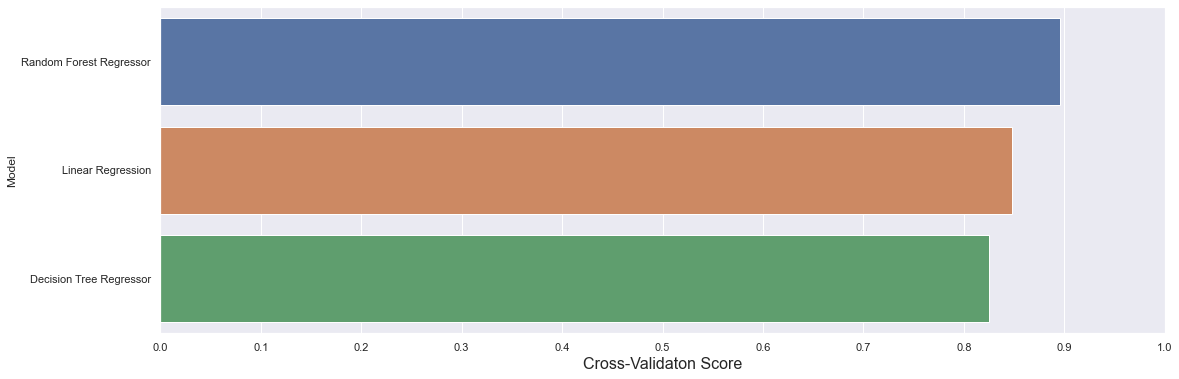

In [29]:
f, ax = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = ax)
ax.set_xlabel('Cross-Validaton Score', size=16)
ax.set_ylabel('Model')
ax.set_xlim(0,1.0)
ax.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()

Inference : We can see that The Random Forest Regressor gives us a better cross validation score as compared to the other two models.

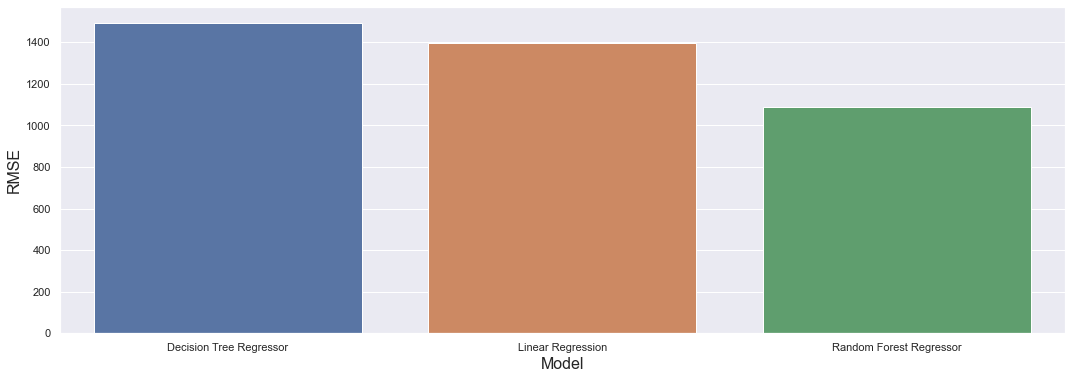

In [30]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, ax = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = ax)
ax.set_xlabel('Model', size=16)
ax.set_ylabel('RMSE', size=16)

plt.show()

Inference: The RMSE values for DT Regressor are high and low for Random forest mdoel , indicating that the Random forest regressor is a better model in terms of predicting the price of the used cars as Decision tres tend to overfit the data.

### Conclusion : 

We have observed that:

 1) Age plays an importanct factor in deciding the price of the used cars.
        
 2) Number of doors also contribute to how the cars are priced , more doors imply bigger cars which in turn imply increased prices.
        
 3) Kilometers run by a car are also a decisive factor of the price as more the distance covered, less the price becomes.